In [1]:
!pip install opencv-python
import cv2
import numpy as np


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [4]:
model =cv2.dnn_DetectionModel(frozen_model,file)

In [6]:
classLabels=( )
file_name='labels.txt'
with open(file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
print(len(classLabels))

80


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001ED12373150>

[ 1 27  1  1  1  1  1  2  1]


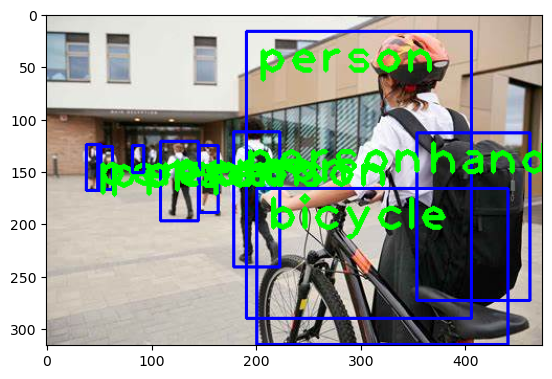

In [10]:
#eg-1
image=cv2.imread('IMAGE - Copy.jpeg')
plt.imshow(image)

classIndex,confidece, bbox=model.detect(image,confThreshold=0.5)
print(classIndex)

#not impacting
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf, boxes in zip(classIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(image,boxes,(255,0,0),2)
    cv2.putText(image,classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, 
                fontScale=font_scale,color=(0,255,0),thickness=3)
    
#impliment
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

[1 1 3 8 1]


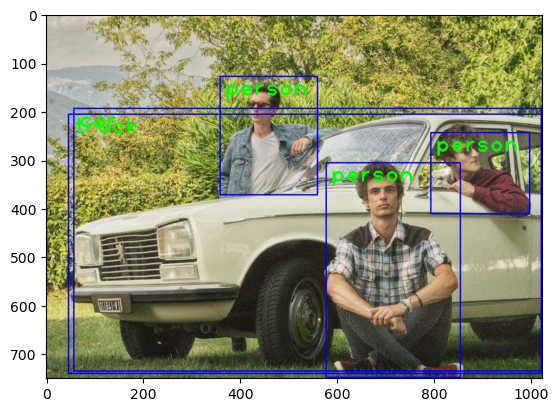

In [11]:
#eg-2
image=cv2.imread('pexels-photo-952413.jpeg')
plt.imshow(image)

classIndex,confidece, bbox=model.detect(image,confThreshold=0.5)
print(classIndex)

#work on image
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classInd,conf, boxes in zip(classIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(image,boxes,(255,0,0),2)
    cv2.putText(image,classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, 
                fontScale=font_scale,color=(0,255,0),thickness=3)
    
#implement
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

In [12]:
#video
cap=cv2.VideoCapture('videos.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()
    
    classIndex, confidece, bbox=model.detect(frame,confThreshold=0.55)
    print(classIndex)
    
    if(len(classIndex)!=0):
        for classInd, conf, boxes in zip (classIndex.flatten(),confidece.flatten(),bbox):
            if(classInd<=80):
                     cv2.rectangle(frame,boxes,(255,0,0),2)
                     cv2.putText(frame,classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, 
                        fontScale=font_scale,color=(0,255,0),thickness=3)                                     
    cv2.imshow('objdetection by simplilearn', frame)

    if cv2.waitKey(2)& 0xff == ord('q'):
        break
        
cap.release()
cv2.destroyaLLWindows()

[ 6  1  1  1 10  1  1  1  1]
[ 6  1  1  1  1  1 10  1]
[ 6  1  1  1  1  1 10]
[ 6  1  1 10  1]
[ 6  1  1  1 10  1  1]
[ 6  1  1 10  1  1  1  1]
[ 6  1  1  1  1  1 10  1  1]
[ 6  1  1  1  1 10  1]
[ 6  1  1  1  1 10  1]
[ 6  1  1  1  1  1 10  1]
[ 6  1  1  1 10  1  1]
[ 6  1  1 10  1  1  1  1]
[ 6  1  1 10  1  1  1  1]
[ 6  1  1  1 10  1]
[ 6  1  1 10  1  1  1  1]
[ 6  1 10  1  1  1  1  1]
[ 6  1 10  1  1  1  1]
[ 6  1 10  1  1  1  1]
[ 6  1  1  1 33  1  1]
[6 1 1 1 1 1]
[6 1 1 1 1 1 7 1 1]
[6 1 1 1 1 1 1]
[1 1 6 1 1 1 1 1 1 1 1]
[ 6  1  1  1  1  1  1  1  1  1  1 10]
[6 1 1 1 1 1 1 1 1 1 1 1]
[ 6  1  1  1  1  1  1  1  1  1  1  1 10]
[1 1 6 1 1 1 1 1 1 1 1 1]
[ 1  6  1  1  1  1  1  1 10  1  1  1]
[ 1  6  1  1  1 10  1  1  1]
[1 6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1 1]
[ 6  1  1  1  1  1  1  1  1  1  1 10]
[1 1 1 6 1 1 1 1 1 1]
[1 1 1 1 6 1 1 1 1 1]
[1 1 7 1 1 1 1 1 6 1 1 1]
[ 1  1  1  1  6  1  1  1  1  1 33  7]
[ 1  1  1  1  1  6  1  1  7  1  1 33]
[ 1  1  1  1  1  1  7

[ 6  1  1  1  1 10  1]
[ 6  1  1  1 10  1  1  1]
[ 6  1  1  1 10  1]
[ 6  1 10  1  1  1]
[ 6  1 10  1  1  1]
[ 6  1 10  1  1  1  1]
[ 6  1 10  1  1  1]
[ 6  1  1  1  1 10]
[6 1 1 1 1 1]
[ 6  1  1 10]
[ 6  1  1  1 10  1  1]
[ 6  1  1  1 10  1  1]
[ 6  1  1  1 10  1]
[ 6  1  1  1 10]
[6 1 1 1]
[ 6  1  1  1  1  1 10  1  1]
[6 1 1 1 1 1 1 1]
[ 6  1  1  1 10  1]
[6 1 1 1 1 1]
[6 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1]
[6 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]
[ 6  1  1  1  1  1  1  1 10  1]
[ 6  1  1  1  1  1  1  1  1  1 10]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1]
[6 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1]
[6 1 1 1 1 1 1 1 1 1]


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [13]:
#video2
cap=cv2.VideoCapture('videobhopal.mp4')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()
    
    classIndex, confidece, bbox=model.detect(frame,confThreshold=0.55)
    print(classIndex)
    
    if(len(classIndex)!=0):
        for classInd, conf, boxes in zip (classIndex.flatten(),confidece.flatten(),bbox):
            if(classInd<=80):
                     cv2.rectangle(frame,boxes,(255,0,0),2)
                     cv2.putText(frame,classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, 
                        fontScale=font_scale,color=(0,255,0),thickness=3)                                     
    cv2.imshow('objdetection by simplilearn', frame)

    if cv2.waitKey(2)& 0xff == ord('a'):
        break
        
cap.release()
cv2.destroyaLLWindows()

[1]
[1 1]
()
()
[1]
[1 1]
[1 1]
[1 1]
[1]
[1]
[1]
[1]
[1 1 1]
[1 1 1]
()
()
()
()
[1]
[1]
[1]
[1]
[1]
[1 1]
[1 1 1 1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1 1 1]
[1 1 1 2 1]
[1 1 1 2 1]
[1 1 1 1 4]
[1 1 1 4]
[1 1 1]
[1 1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1 1 1]
[1 1 1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 6]
[1 1]
[1 1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1]
[1 1 6]
[1 1]
[1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1 1]
[1 1]
[1 8 1]
[1 1 8 1]
[1 1 8 1]
[1 8 1]
[1 8 1]
[1 8]
[1 8]
[8 1 1]
[1 8]
[1 8]
[8 1 6]
[8 1]
[1]
[1 8]
[1 8 1]
[1 1]
[1]


AttributeError: module 'cv2' has no attribute 'destroyaLLWindows'

In [14]:
#Live
cap=cv2.VideoCapture('1')
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cant open the video')
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()
    
    classIndex, confidece, bbox=model.detect(frame,confThreshold=0.55)
    print(classIndex)
    
    if(len(classIndex)!=0):
        for classInd, conf, boxes in zip (classIndex.flatten(),confidece.flatten(),bbox):
            if(classInd<=80):
                     cv2.rectangle(frame,boxes,(255,0,0),2)
                     cv2.putText(frame,classLabels[classInd-1], (boxes[0]+10, boxes[1]+40), font, 
                        fontScale=font_scale,color=(0,255,0),thickness=3)                                     
    cv2.imshow('objdetection by simplilearn', frame)

    if cv2.waitKey(2)& 0xff == ord('a'):
        break
        
cap.release()
cv2.destroyaLLWindows()

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
()
[18]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


AttributeError: module 'cv2' has no attribute 'destroyaLLWindows'